# Beautiful Soup Scripts - POST Request

*To Run - Open file in Jupyter Notebook - Kernel -> Restar and Run All*

**This book contains an example of a Beautiful Soup POST Request** 

1. The bot goes to a site to collect data from an Indian education website to find various state wise education statistics (Picture Below)


2. Post requests are used to communicate with the Host to by exchanging the required payloads. Sometimes the host maybe a  simple API in the backend or a complex POST request with many URLs in play.

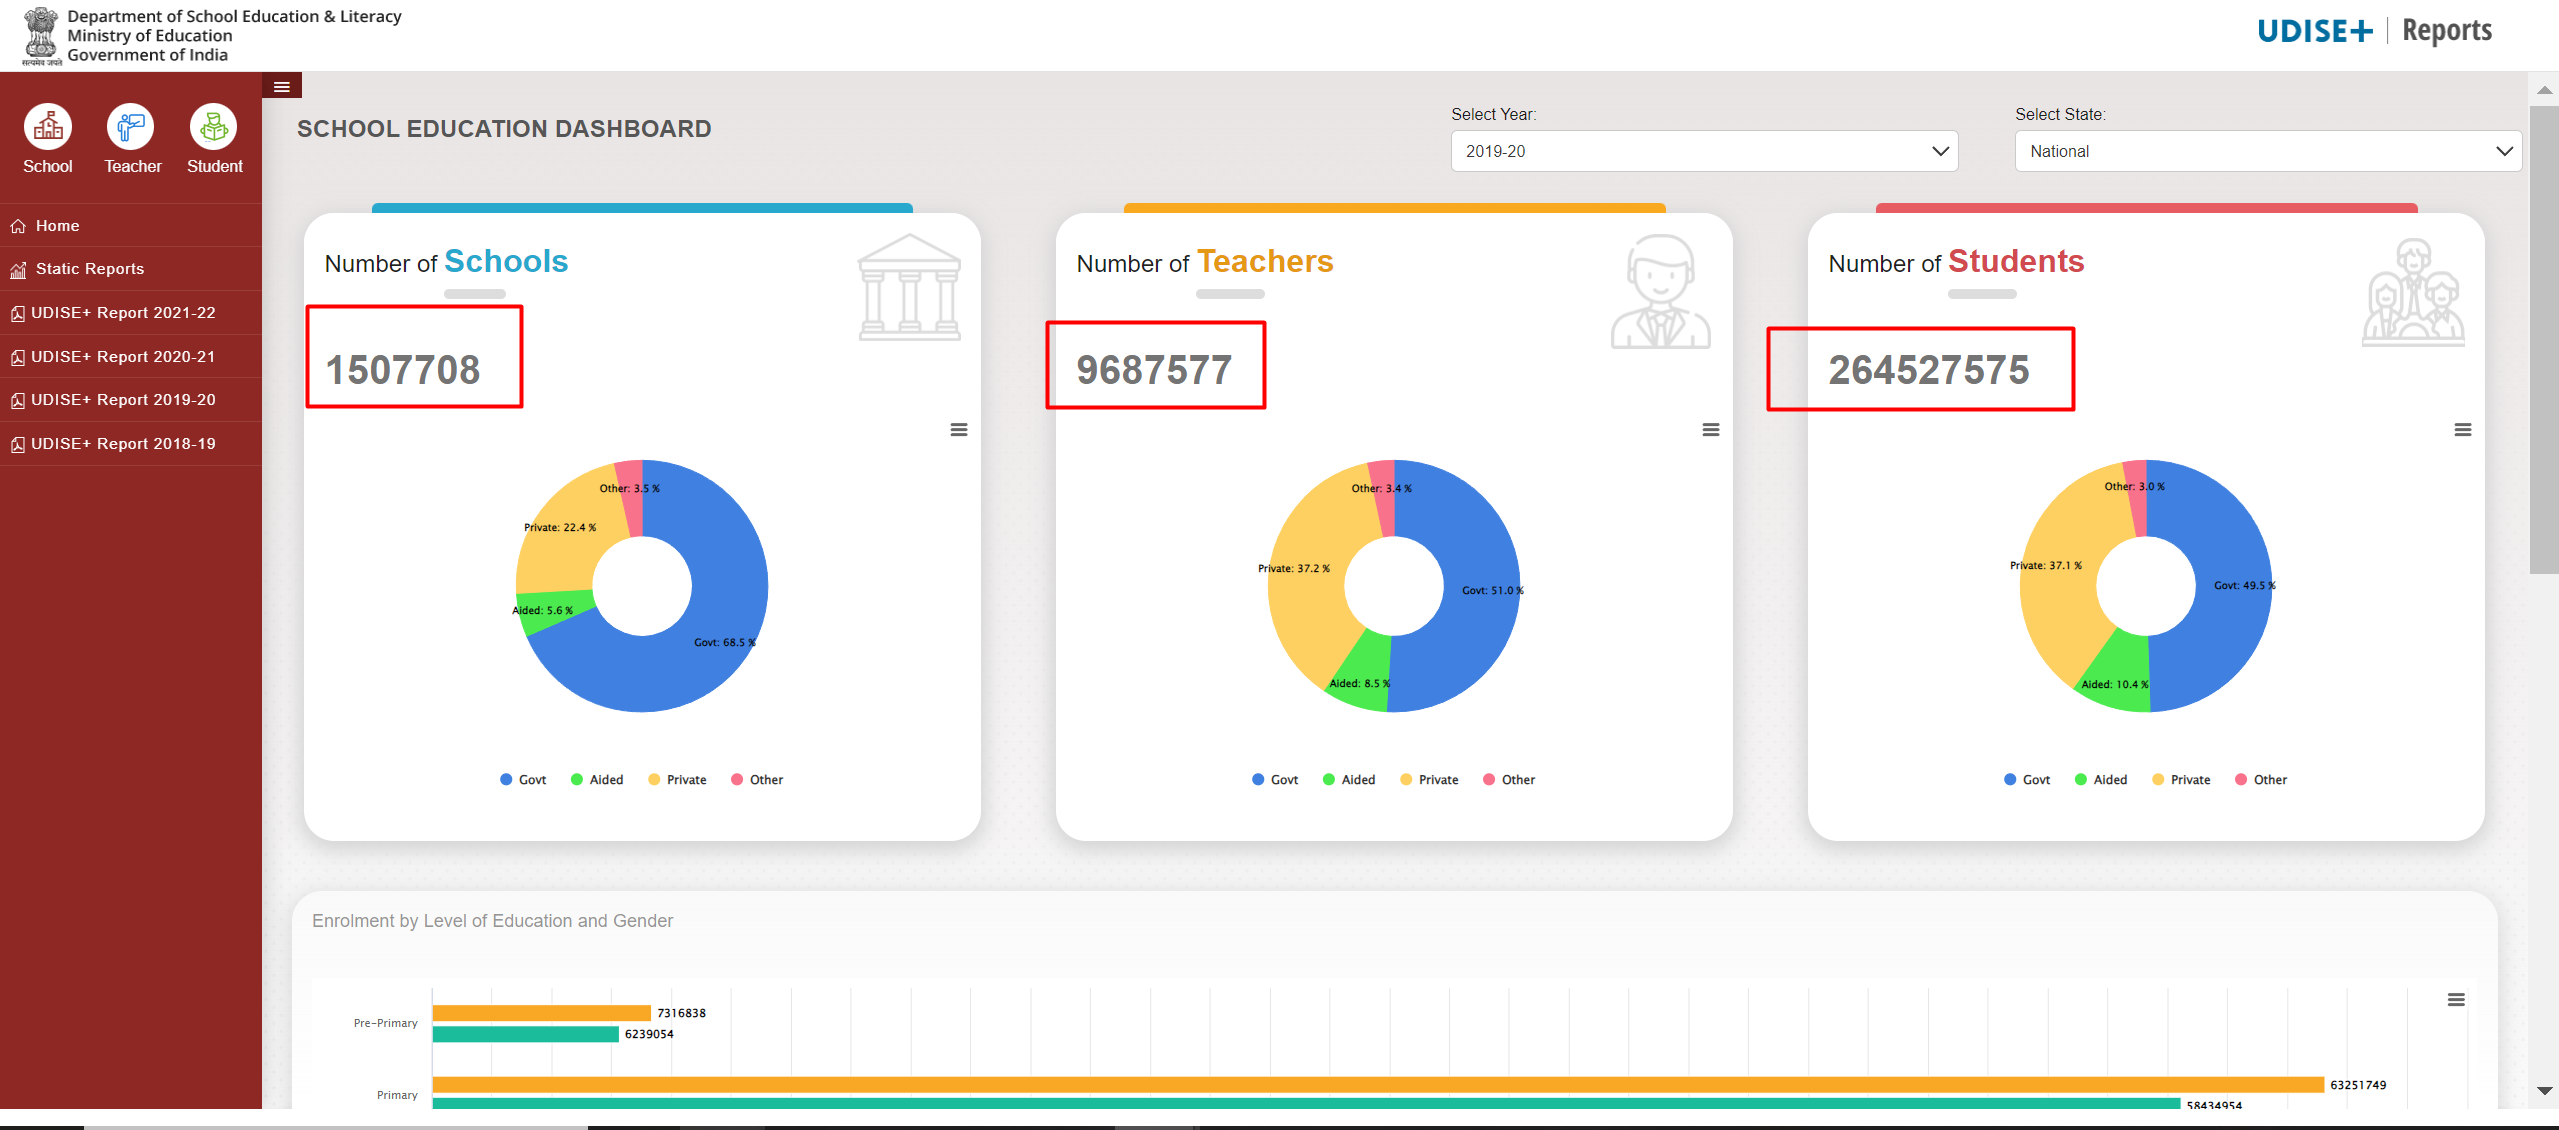

In [8]:
'''
Importing Required Packages
'''
import sqlalchemy
import pandas as pd
from pandas.io import sql
import os
import requests
from bs4 import BeautifulSoup
import re
import datetime as datetime
from pytz import timezone
import sys
import warnings
warnings.filterwarnings('ignore')
#sys.path.insert(0, '/home/ubuntu/AdQvestDir/Adqvest_Function')
import numpy as np
import csv
import calendar
import pdb
import calendar
#import adqvest_db
import time
import json
#import JobLogNew as log

## First Step

- Now we opening the Network tab window - we can see that the data on the front end gets populated by an API.
- Each API call happens with certain distinct numeric codes and in the JSON datastrcturee 
- Hence the first step will be to aaccess these codes 
- Below we acceess the various states and store it as a dataframe
- JSON are dictionaries and can be converted easily  to Pandas dataframes


In [2]:
url = 'https://dashboard.udiseplus.gov.in/BackEnd-master/api/main/getStateListByYear'
headers = {"user-agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.61 Safari/537.36",
          'Accept':'application/json, text/plain, */*',
          'content-type':'text/plain; charset=UTF-8'}

r = requests.post(url,data='2019-20',headers=headers)
print(r.status_code)
time.sleep(1)

200


## Second Step - States and State Codes

Now this is used to access each states data based on the code

The data we obtain from the Host server is a JSON in the form of a String. this can be converted to JSON by using the JSON package. 

Accessing the raw data from the JSON wee can see we have the backend access codes to obtain the statwise raw data

In [3]:
raw_data = json.loads(r.text)
col_names = raw_data['columnName']
datapoints = raw_data['rowValue']
data = pd.DataFrame(datapoints)
print(data.head())
state_name = list(data.iloc[:,1])
state_id = list(data.iloc[:,0])
years = [f"{year}-{str(year+1)[-2:]}" for year in range(2015, 2024)]
time.sleep(1)

   state_id                 state_name state_code created_by  \
0       135  Andaman & Nicobar Islands         35      ADMIN   
1       128             Andhra Pradesh         28      ADMIN   
2       112          Arunachal Pradesh         12      ADMIN   
3       118                      Assam         18      ADMIN   
4       110                      Bihar         10      ADMIN   

          created_time modified_by        modified_time status  \
0  2019-06-09 12:24:59       ADMIN  2019-06-09 12:24:59      A   
1  2019-06-09 12:24:59       ADMIN  2019-06-09 12:24:59      A   
2  2019-06-09 12:24:59       ADMIN  2019-06-09 12:24:59      A   
3  2019-06-09 12:24:59       ADMIN  2019-06-09 12:24:59      A   
4  2019-06-09 12:24:59       ADMIN  2019-06-09 12:24:59      A   

                                                path type  banner  \
0  <path d=M248.23,365.29l-.1,1.22,2,.8.27,6.44,3...   UT  an.jpg   
1  <path d=M275.21,160.2v0h0Zm1.49-.09-.89,5.66-1...    S  ap.jpg   
2  <path d=

## Final Step - Sample Data
 
For this example I am not iterating through all the states, rather I am going to take the first element of each list 

- States - `state_name`, `state_id`
- Year  - `dates`

```
data = {"state_code":state_id[0],"year":years[0]}

```
- This JSON contains the State and the year for which we want the data

- Sending this to the host server using a POST request will yield the required final data


In [7]:
url = 'https://dashboard.udiseplus.gov.in/BackEnd-master/api/report/getSedashboardData'
headers = {"user-agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.61 Safari/537.36",
          'Accept':'application/json, text/plain, */*',
          'content-type':'text/plain; charset=UTF-8'}

data = {"state_code":state_id[0],"year":years[0]}
r = requests.post(url,json=data,headers=headers)
print(r.status_code)
raw_data = json.loads(r.text)
col_names = raw_data['columnName']
datapoints = raw_data['rowValue']
main_data = pd.DataFrame(datapoints)
print(main_data)

200
   student_count  student_govt  student_aided  student_private  student_other  \
0          81575         61018           2083            18474              0   

   boys_primary  boys_upperprimary  boys_secondary  boys_highersecondary  \
0         15991               9528            6631                  5374   

   girls_primary  ...  drink_water_yn_n  drink_water_yn_govt_n  \
0          15415  ...                 0                      0   

   drink_water_yn_aided_n drink_water_yn_pvt_n  drink_water_yn_other_n  \
0                       0                    0                       0   

   medchk_yn_n  medchk_yn_govt_n  medchk_yn_aided_n  medchk_yn_pvt_n  \
0           32                25                  0                7   

   medchk_yn_other_n  
0                  0  

[1 rows x 122 columns]
